# Kelompok 17
## Kelas_Nama :
- Alan Turing23_Ersa Rosyana
- Atlas_Muhammad Iqbal
- Better_Farhan Ramadhan
- Persevere_Luthfi Al Fikri
- Visioner_Dimas Aryanto Wijaya

In [1]:
# Menentukan Langkah Kaki Menggunakan Monte Carlo
import random

def random_walk_2(n):
    """Return coordinate after 'n' block random walk."""
    x,y = 0,0
    for i in range(n):
        dx,dy = random.choice([(0,1), (0,-1), (1,0), (-1,0)])
        x += dx
        y += dy
    return (x, y)

number_of_walk = 10000

for walk_length in range(1, 31):
    no_transport = 0 # number of walk 4 or fewer blocks from home
    for i in range(number_of_walk):
        (x,y) = random_walk_2(walk_length)
        distance = abs(x) + abs(y)
        if distance <= 4:
            no_transport += 1
        
    no_transport_percent = float(no_transport) / number_of_walk
    print("Walk size = ", walk_length, " / % of no transport = ", 100*no_transport_percent)

Walk size =  1  / % of no transport =  100.0
Walk size =  2  / % of no transport =  100.0
Walk size =  3  / % of no transport =  100.0
Walk size =  4  / % of no transport =  100.0
Walk size =  5  / % of no transport =  87.74
Walk size =  6  / % of no transport =  94.14
Walk size =  7  / % of no transport =  77.0
Walk size =  8  / % of no transport =  86.31
Walk size =  9  / % of no transport =  66.93
Walk size =  10  / % of no transport =  79.86999999999999
Walk size =  11  / % of no transport =  59.69
Walk size =  12  / % of no transport =  72.47
Walk size =  13  / % of no transport =  53.55
Walk size =  14  / % of no transport =  67.41
Walk size =  15  / % of no transport =  48.52
Walk size =  16  / % of no transport =  62.81
Walk size =  17  / % of no transport =  44.31
Walk size =  18  / % of no transport =  58.730000000000004
Walk size =  19  / % of no transport =  41.04
Walk size =  20  / % of no transport =  53.559999999999995
Walk size =  21  / % of no transport =  38.22
Walk s

Impor, gym untuk roulette, numpy untuk matematika, dan matplotlib untuk membuat grafik hasilnya. Jadikan lingkungan blackjack kita. Atur Epsilon menjadi 5% dari waktu memilih tindakan acak. Tetapkan Gamma ke 1, kami tidak akan mempertimbangkan kemungkinan hadiah di masa mendatang karena tidak ada jaminan dalam roulette. Inisialisasi semua yang lain ke 0 atau kosongkan dan ukurannya sesuai dengan dokumentasi roulette gym OpenAI.

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
env = gym.make('Roulette-v0')
EPS = 0.05
GAMMA = 1.0
Q = {}
agentSumSpace = [i for i in range(0,37)]
actionSpace = [i for i in range(0, 38)]
stateSpace = []
returns = {}
pairsVisited = {}
for total in agentSumSpace:
    for action in actionSpace:
        Q[(total, action)] = 0
        returns[(total, action)] = 0
        pairsVisited[(total, action)] = 0
    stateSpace.append(total)

Inisialisasi kebijakan kami secara acak.

In [3]:
policy = {}
for state in stateSpace:
    policy[state] = np.random.choice(actionSpace)

Satu juta episode pelatihan seharusnya cukup untuk melatih kebijakan yang baik. Inisialisasi beberapa variabel untuk menggunakan setiap episode. Periksa kemajuan kami setiap seratus ribu episode. Atur ulang lingkungan.

In [4]:
numEpisodes = 1000000
for i in range(numEpisodes):
        statesActionsReturns = []
        memory = []
        if i % 100000 == 0:
            print('starting episode', i)
        observation = env.reset()
        done = False

starting episode 0
starting episode 100000
starting episode 200000
starting episode 300000
starting episode 400000
starting episode 500000
starting episode 600000
starting episode 700000
starting episode 800000
starting episode 900000


Sampai permainan selesai, ambil tindakan berdasarkan kebijakan Monte Carlo kami, dan catat hasilnya. Tindakannya adalah memasang taruhan atau bangkit dari meja.

In [5]:
while not done:
    action = policy[observation]
    observation_, reward, done, info = env.step(action)
    memory.append((observation, action, reward))
    observation = observation_
memory.append((observation, action, reward))

Langkah mundur melalui memori untuk merekam hadiah berdasarkan pasangan status/aksi sebelumnya.

In [6]:
G = 0
last = True
for observed, action, reward in reversed(memory):
        if last:
            last = False
        else:
            statesActionsReturns.append((observed, action, G))
        G = GAMMA*G + reward
statesActionsReturns.reverse()
statesActionsVisited = []

Bagian selanjutnya inilah dimana proses keputusan Monte Carlo terjadi. Ini mungkin terlihat menakutkan, tetapi saya akan mencoba menjelaskannya. Kami akan melalui setiap pasangan keadaan/tindakan dan hadiah untuk mengambil tindakan itu saat dalam keadaan itu. Jika pasangan keadaan/tindakan belum dikunjungi sebelum kita membandingkan imbalan dari tindakan lain dari keadaan itu untuk menentukan tindakan terbaik dari keadaan itu. Kami memilih tindakan acak jika seri. Pada awalnya, akan lebih mungkin untuk mengambil tindakan baru, tetapi seiring waktu epsilon akan berkurang dan kami hanya akan mengambil tindakan terbaik yang sudah diketahui.

In [7]:
for observed, action, G in statesActionsReturns:
    sa = (observed, action)
    if sa not in statesActionsVisited:
        pairsVisited[sa] += 1
        returns[(sa)] += (1 / pairsVisited[(sa)])*(G-returns[(sa)])
        Q[sa] = returns[sa]
        rand = np.random.random()
        if rand < 1 - EPS:
            state = observed
            values = np.array([Q[(state, a)] for a in actionSpace ])
            best=np.random.choice(np.where(values==values.max())[0])
            policy[state] = actionSpace[best]
        else:
            policy[state] = np.random.choice(actionSpace)
        statesActionsVisited.append(sa)
if EPS - 1e-7 > 0:
    EPS -= 1e-7
else:
    EPS = 0

Uji kebijakan Monte Carlo kami yang terlatih.

In [8]:
numEpisodes = 1000
rewards = np.zeros(numEpisodes)
totalReward = 0
wins = 0
losses = 0
print('getting ready to test policy')   
for i in range(numEpisodes):
        observation = env.reset()
        done = False
        while not done:
            action = policy[observation]
            observation_, reward, done, info = env.step(action)
            observation = observation_
        totalReward += reward
        rewards[i] = totalReward
if reward >= 1:
            wins += 1
elif reward == -1:
            losses += 1

getting ready to test policy


Cetak hasilnya.

win rate 0.001 loss rate 0.0


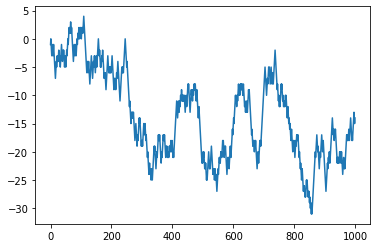

In [9]:
wins /= numEpisodes
losses /= numEpisodes
print('win rate', wins, 'loss rate', losses)
plt.plot(rewards)
plt.show()

Hasilnya jelas, nol kemenangan dan nol kerugian. Cara terbaik untuk memenangkan roulette adalah dengan tidak bermain sama sekali. Keputusan kebijakan Cheeky Monte Carlo untuk meninggalkan meja setiap pertandingan. Itu benar. Rumah selalu menang, itu adalah permainan yang kalah. Hanya untuk bersenang-senang, mari kita lihat apa yang terjadi jika kami memaksakan kebijakan Monte Carlo kami untuk bermain dengan mengubah satu baris kode.

In [10]:
actionSpace = [i for i in range(0, 38)]

Hapus opsi untuk bangun dari meja.

In [11]:
actionSpace = [i for i in range(0, 37)]